In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator

In [2]:
training_data = pd.read_csv('data/training.csv',index_col = 0)

In [3]:
# Encode the Labels (either as 0,1,2 for classification or -1,0,1 for regression)
label_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
training_data['label_encoded'] = training_data['label'].map(label_mapping)
training_data['length'] = training_data['sentence'].apply(len)

In [4]:
training_data.head()

,sentence,label,label_encoded,length
id,,,,
0,Those 2 drinks are part of the HK culture and ...,negative,-1,81
1,I was told by the repair company that was doin...,negative,-1,118
2,It is there to give them a good time .,neutral,0,38
3,Like leafing through an album of photos accomp...,negative,-1,83
4,Johnny was a talker and liked to have fun.,positive,1,42


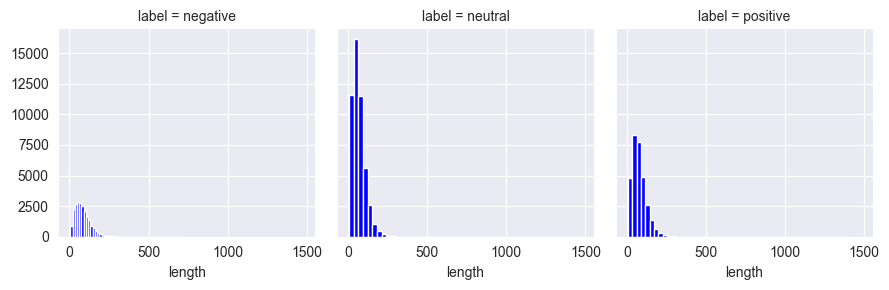

In [5]:
graph = sns.FacetGrid(data=training_data,col='label')
graph.map(plt.hist,'length',bins=50,color='blue')

Text(0.5, 1.0, 'Pie chart for label distribution')

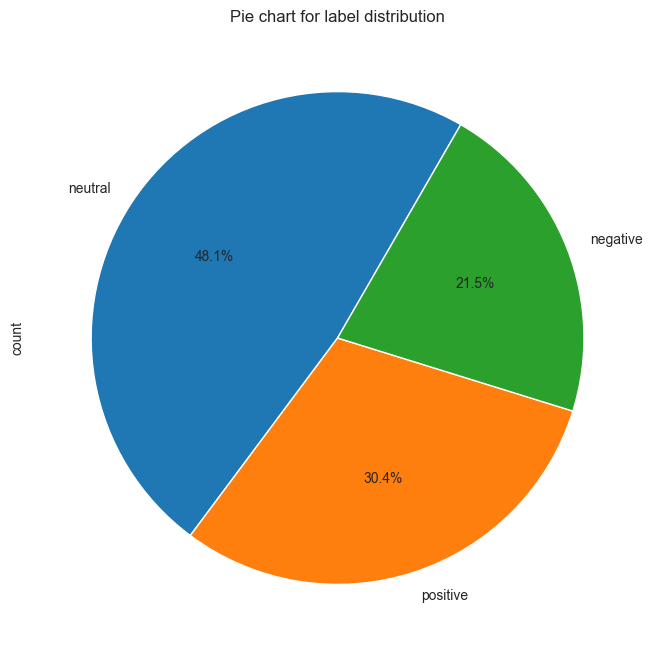

In [6]:
plt.figure(figsize=(8,8))
training_data['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Pie chart for label distribution')

# Detect language and translate all non-english sentences to english

In [40]:
from langdetect import detect, DetectorFactory
from deep_translator import GoogleTranslator
from tqdm import tqdm


DetectorFactory.seed = 0

df = pd.read_csv("data/training.csv", index_col=0)

# for empty strings or null values
def detect_language(text):
    try:
        if isinstance(text, str) and text.strip():
            return detect(text)
        else:
            return "unknown"
    except:
        return "unknown"

def translate_to_english(text):
    try:
        if not isinstance(text, str):
            return ""

        # because "!!!" is "none" after translation
        if re.fullmatch(r"[\W_]+", text.strip()):
            return text

        result = GoogleTranslator(source='auto', target='en').translate(text)

        if result is None or result.lower() == "none":
            return text

        return result

    except:
        return text

tqdm.pandas()

# first detect language
df["lang"] = df["sentence"].progress_apply(detect_language)

# translate only non-English
def conditional_translate(row):
    if row["lang"] != "en":
        return translate_to_english(row["sentence"])
    else:
        return row["sentence"]

df["sentence_translated"] = df.progress_apply(conditional_translate, axis=1)

df.to_csv("data/training_with_translations.csv", index=True)



100%|██████████| 102097/102097 [23:36<00:00, 72.07it/s] 


'I love you'

In [13]:
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0  # to make results deterministic

def safe_detect(text):
    try:
        if isinstance(text, str) and text.strip():  # Check for non-empty string
            return detect(text)
        else:
            return "unknown"
    except:
        return "unknown"

# Create a new column for language
training_data["lang"] = training_data["sentence"].apply(safe_detect)

# Optionally, keep just label, sentence, length
new_df = training_data[["label", "sentence", "length", "lang"]]

# Filter out non-English rows
nonen = new_df[new_df["lang"] != "en"]


In [22]:
nonen

,label,sentence,length,lang
id,,,,
20,positive,You could tell homemade.,24,fr
73,positive,It says anyway.,15,tl
106,neutral,"En cualquier otro día habría dado 5 estrellas,...",154,es
113,neutral,So be careful.,14,ro
128,neutral,We were not!,12,af
...,...,...,...,...
101997,positive,wow!!,5,pl
102040,neutral,"My boyfriend got a half salad, half ham and ch...",60,cy
102050,neutral,Gasppppp.,9,sv


In [26]:
from deep_translator import GoogleTranslator

def translate_to_en(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text  # fallback in case translation fails

# Apply only to non-English
#non_en_mask = training_data["lang"] != "en"
#training_data.loc[non_en_mask, "sentence"] = training_data.loc[non_en_mask, "sentence"].apply(translate_to_en)
nonen["translated"] = nonen["sentence"].apply(translate_to_en)

C:\Users\Florian\AppData\Local\Temp\ipykernel_9492\892172253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonen["translated"] = nonen["sentence"].apply(translate_to_en)


In [27]:
nonen

,label,sentence,length,lang,translated
id,,,,,
20,positive,You could tell homemade.,24,fr,You could tell homemade.
73,positive,It says anyway.,15,tl,It says anyway.
106,neutral,"En cualquier otro día habría dado 5 estrellas,...",154,es,"In any other day I would have given 5 stars, b..."
113,neutral,So be careful.,14,ro,So be careful.
128,neutral,We were not!,12,af,We were not!
...,...,...,...,...,...
101997,positive,wow!!,5,pl,wow!!
102040,neutral,"My boyfriend got a half salad, half ham and ch...",60,cy,"My boyfriend got a half salad, half ham and ch..."
102050,neutral,Gasppppp.,9,sv,Gasppppp.


In [39]:
import re
from deep_translator import GoogleTranslator

def translate_to_en(text):
    try:
        if not isinstance(text, str):
            return ""

        # Check if text only contains punctuation or whitespace
        if re.fullmatch(r"[\W_]+", text.strip()):
            return text  # return original — or "" if you prefer to drop it later

        result = GoogleTranslator(source='auto', target='en').translate(text)

        if result is None or result.lower() == "none":
            return text

        return result

    except:
        return text


print(translate_to_en("Ja ein Satz!"))

hmmm


# Outlier detection
Could consider removing
- too long sentences
- too short sentences
- garbage text

# Further preprocessing steps
- replace emojis with tags __positive_emoji
- sooo -> so
- remove urls (-> <URL>)
- lowercasing
- expand contractions "can't -> cannot"
Not for BERT:
- maybe stopword removal (for classic ML models)
- Lemmatization
- Remove punctuation

## Check for duplicate sentences

In [12]:
all_duplicates = training_data[training_data["sentence"].duplicated(keep=False)]

print(f"Total duplicated entries (all appearances): {all_duplicates.shape[0]}")
print(all_duplicates.sort_values("sentence"))

Total duplicated entries (all appearances): 36
                                                 sentence     label  \
id                                                                    
100447                         ... a pretentious mess ...  negative   
64662                          ... a pretentious mess ...  negative   
88492        Every joke is repeated at least four times .  negative   
85427        Every joke is repeated at least four times .  negative   
10677   For a film that 's being advertised as a comed...  negative   
73382   For a film that 's being advertised as a comed...  negative   
7570                                    Great atmosphere.  positive   
48767                                   Great atmosphere.  positive   
96620                                  I have had better.  negative   
38324                                  I have had better.  negative   
78733                                         I like it .  positive   
48995                         

Without preprocessing, there are only 18 duplicates of which only 1 pair of duplicate has different labels. This is not a problem, but we will also explore the duplicates after the preprocessing.

## Check how many urls in data:

In [11]:
import re

url_pattern = r"http[s]?://\S+|www\.\S+"
training_data["num_links"] = training_data["sentence"].apply(lambda x: len(re.findall(url_pattern, str(x))))

total_links = training_data["num_links"].sum()

print(f"{total_links}")

94


In [12]:
training_data.isnull().sum()

sentence         0
label            0
label_encoded    0
length           0
num_links        0
dtype: int64

# Human Labeling
Just run human_labeling_app.py now

In [7]:
# sample 500 random sentences for human labeling
df = pd.read_csv("data/training.csv", index_col=0)

sampled_df = df.sample(n=500, random_state=42).copy()

sampled_df = sampled_df.drop('label', axis = 1)

sampled_df.to_csv("data/human_label_sample.csv", index=True)


Human vs Ground Truth — MAE: 0.2600
Custom Score (L): 0.8700


# Find best preprocessing for baseline

In [2]:
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from preprocessing import Preprocessor

training_data = pd.read_csv('data/training.csv', index_col=0)
# Encode the Labels (either as 0,1,2 for classification or -1,0,1 for regression)
label_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
training_data['label_encoded'] = training_data['label'].map(label_mapping)
#training_data['sentence'] = training_data['sentence_translated']


# preprocessing options
options = {
    "lowercase": [True, False],
    "remove_urls": [True, False],
    "expand_contractions": [True, False],
    "normalize_repeated_chars": [True, False],
    "remove_punctuation": [True, False],
    "remove_stopwords": [True, False],
    "lemmatize": [True, False]
}

# Create all combinations
keys, values = zip(*options.items())
experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]

best_score = 0
best_config = None

for config in experiments:
    print(f"Testing config: {config}")

    pre = Preprocessor(
        **config
    )
    sentences, kept_indices = pre.transform(training_data["sentence"])
    labels = training_data['label_encoded'].iloc[kept_indices].tolist()

    train_sentences, val_sentences, train_labels, val_labels = train_test_split(
        sentences, labels, test_size=0.1, stratify=labels, random_state=42
    )

    # Vectorize
    vectorizer = CountVectorizer(ngram_range=(1,2), max_features=10000)
    X_train = vectorizer.fit_transform(train_sentences)
    X_val = vectorizer.transform(val_sentences)

    # Train model
    model = LogisticRegression(C=1.0, max_iter=500)
    model.fit(X_train, train_labels)
    Y_val_pred = model.predict(X_val)

    # Evaluate
    mae_val = mean_absolute_error(val_labels, Y_val_pred)
    L_score_val = 0.5 * (2 - mae_val)

    print(f"L Score on validation set: {L_score_val:.4f}")

    if L_score_val > best_score:
        best_score = L_score_val
        best_config = config


Testing config: {'lowercase': True, 'remove_urls': True, 'expand_contractions': True, 'normalize_repeated_chars': True, 'remove_punctuation': True, 'remove_stopwords': True, 'lemmatize': True}
L Score on validation set: 0.8028
Testing config: {'lowercase': True, 'remove_urls': True, 'expand_contractions': True, 'normalize_repeated_chars': True, 'remove_punctuation': True, 'remove_stopwords': True, 'lemmatize': False}
L Score on validation set: 0.8009
Testing config: {'lowercase': True, 'remove_urls': True, 'expand_contractions': True, 'normalize_repeated_chars': True, 'remove_punctuation': True, 'remove_stopwords': False, 'lemmatize': True}
L Score on validation set: 0.8002
Testing config: {'lowercase': True, 'remove_urls': True, 'expand_contractions': True, 'normalize_repeated_chars': True, 'remove_punctuation': True, 'remove_stopwords': False, 'lemmatize': False}
L Score on validation set: 0.7986
Testing config: {'lowercase': True, 'remove_urls': True, 'expand_contractions': True, 'n

In [3]:
best_score

0.8040467537569983

In [6]:
best_config

{'lowercase': True,
 'remove_urls': True,
 'expand_contractions': False,
 'normalize_repeated_chars': True,
 'remove_punctuation': True,
 'remove_stopwords': True,
 'lemmatize': True}